In [278]:
import numpy as np 
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def plot_image(img: np.array):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

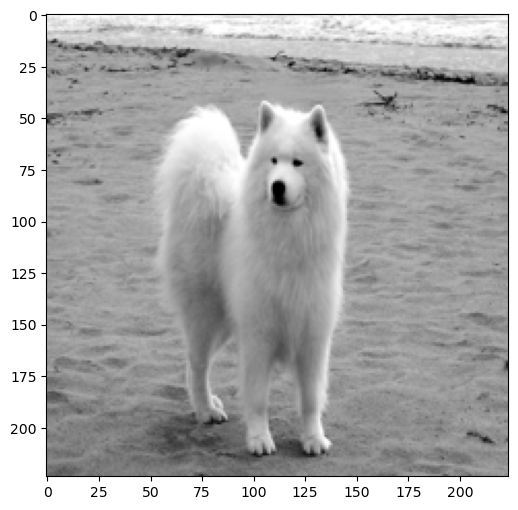

In [280]:
img = Image.open('picture.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224,224))
plot_image(img)


In [281]:
def convolv(img, kernel):
    img = np.array(img)

    size_kernel = len(kernel)
    size_conv = len(img)-1

    convolved = np.zeros((size_conv, size_conv))

    for i in range(size_conv - size_kernel + 1):
        for j in range(size_conv - size_kernel + 1):
            convolved[i][j] = np.sum(img[i:i+size_kernel, j:j+size_kernel] * kernel)
            
    return(convolved)

def max_pooling2d(img):
    img = np.array(img)
    size_kernel = 2
    size_conv = len(img)-1
    convolved = np.zeros(((size_conv//2)+1, (size_conv//2)+1))
    print(convolved.shape)
    x=0
    y=0
    for i in range(0, size_conv+1, 2):
        for j in range(0, size_conv+1, 2):
            convolved[x][y] = np.max(img[i:i+size_kernel, j:j+size_kernel])
            y+=1
        y=0
        x+=1
    return(convolved)


(112, 112)
(112, 112)
(56, 56)
(28, 28)
(14, 14)


<function __main__.plot_two_images(img1: <built-in function array>, img2: <built-in function array>)>

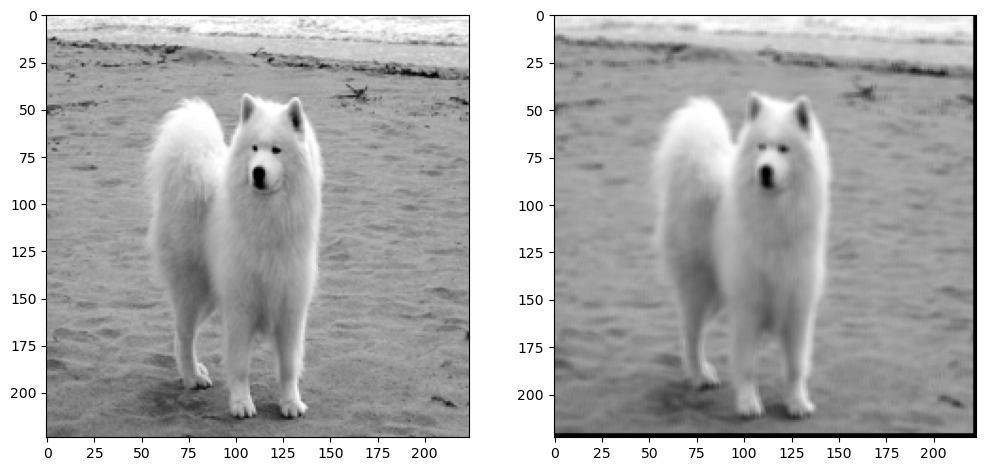

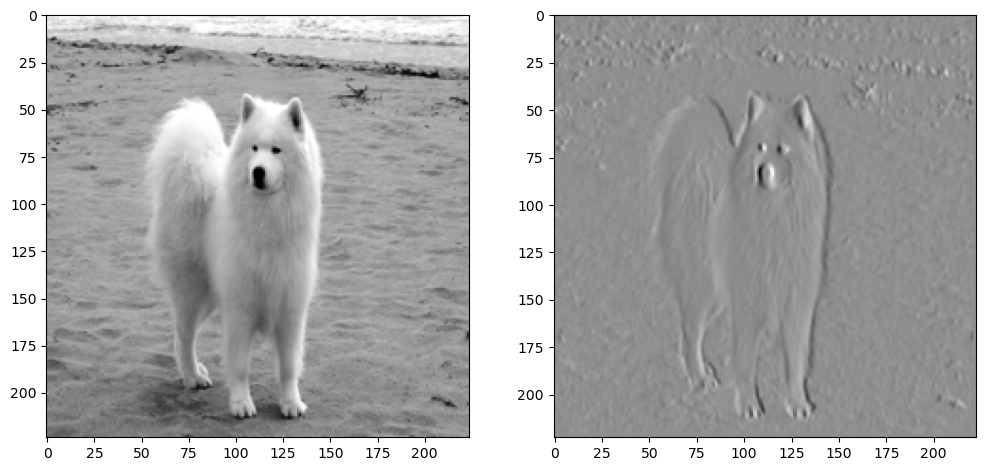

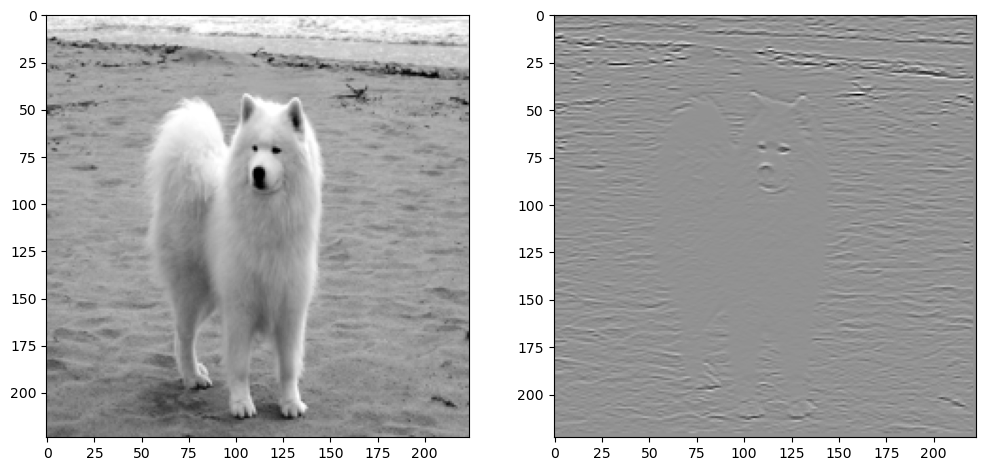

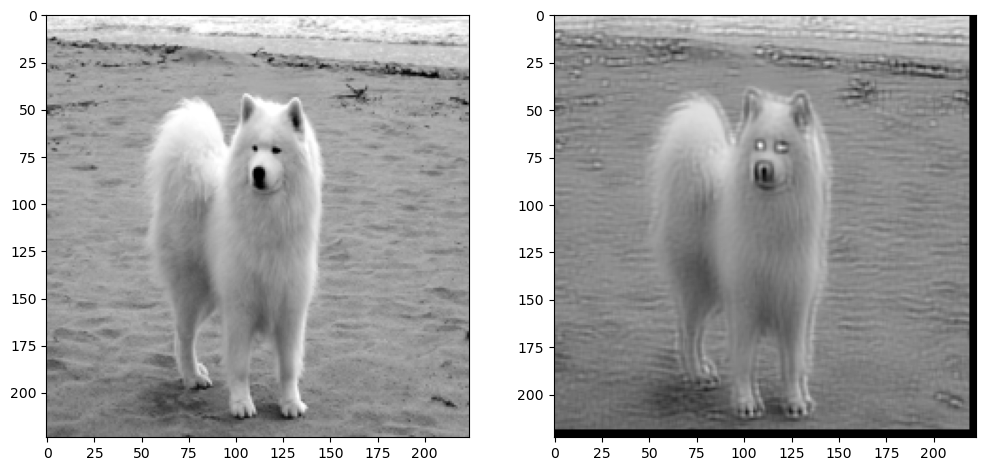

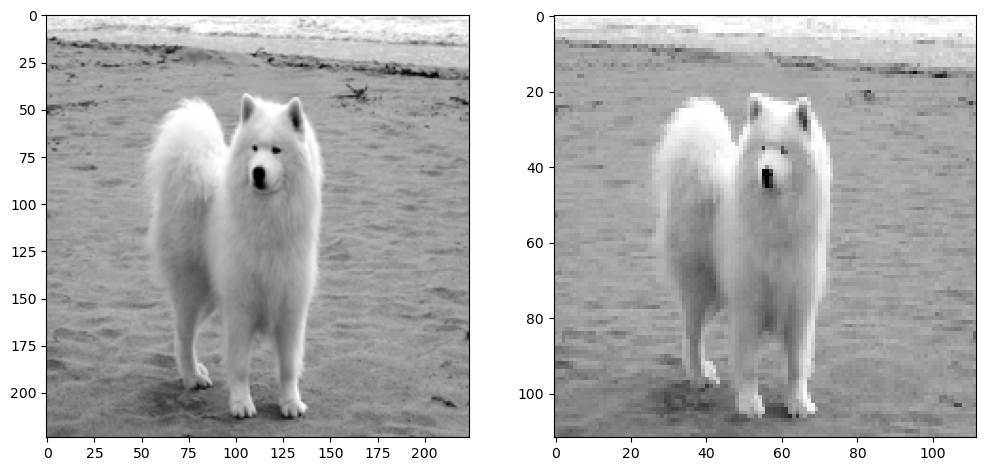

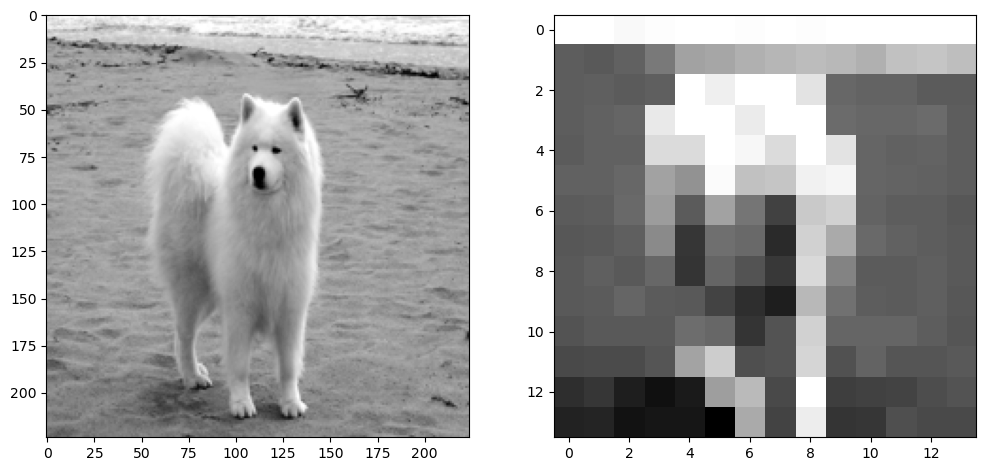

In [299]:
num_kernels = 3
size=3
def apply_kernels(img, num_kernels, size):
    filters = []
    for i in range(num_kernels):
        filters.append(np.random.random((size,size)))
    feature_map = []
    for f in filters:
        feature_map.append(convolv(img, f))
    return feature_map

filter1 = np.array([[1,0,1],
                   [1,0,1],
                   [1,0,1]])

                   
filter2 = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])

                   
filter3 = np.array([[-2,-2,-2],
                   [4,4,4],
                   [-2,-2,-2]])

                   
filter4 = np.array([[1,1,1,1,1],
                   [1,-1,-1,-1,1],
                   [1,-1,-1,-1,1],
                   [1,-1,-1,-1,1],
                   [1,1,1,1,1]])

plot_two_images(img, convolv(img, filter1))
plot_two_images(img, convolv(img, filter2))
plot_two_images(img, convolv(img, filter3))
plot_two_images(img, convolv(img, filter4))
plot_two_images(img, max_pooling2d(img))
plot_two_images(img, max_pooling2d(max_pooling2d(max_pooling2d(max_pooling2d(img)))))
plot_two_images
